In [31]:
import numpy as np
import pandas as pd

file_path = "../../data/raw/yp_competitors_rws.csv"
dataset = pd.read_csv(file_path) 

In [32]:
dataset.head()

,alias,ratingValue,dataPublished,description,author
0,kimos-maui-lahaina,5,2019-01-06,I stumbled across this great restaurant overlo...,Bella L.
1,kimos-maui-lahaina,5,2019-01-04,Excellent view on the ocean at sunset.\nExcell...,Rachou A.
2,kimos-maui-lahaina,3,2018-12-25,This place was not what the reviews portrayed ...,Ozzetta B.
3,kimos-maui-lahaina,2,2018-12-08,We were excited to repeat our Keoki's (in Kaua...,Arleen C.
4,kimos-maui-lahaina,3,2018-11-29,"If you're looking for a tourist spot, this is ...",Carol B.


In [33]:
dataset.ratingValue.value_counts()

5    11050
4     3970
3     1669
1     1172
2     1157
Name: ratingValue, dtype: int64

In [34]:
dataset.alias.value_counts()[:10]

ululanis-hawaiian-shave-ice-lahaina    2611
kimos-maui-lahaina                     2568
lahaina-fish-lahaina                   1943
lahaina-grill-lahaina                  1845
808-grindz-cafe-lahaina-2              1772
fleetwoods-lahaina-5                   1250
lahaina-luna-cafe-lahaina              1032
longhis-lahaina                         638
lahaina-pizza-company-lahaina           637
sale-pepe-lahaina                       632
Name: alias, dtype: int64

In [35]:
dataset.count()

alias            19018
ratingValue      19018
dataPublished    19018
description      19018
author           19018
dtype: int64

In [13]:
from datetime import datetime
dataset = dataset.dataPublished.apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

In [26]:
a = range(0, len(dataset))
b = dataset
data = list(zip(a, b))

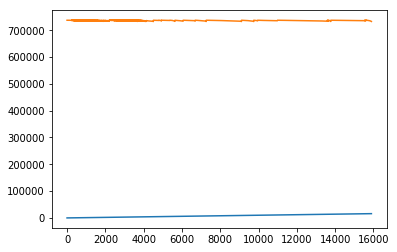

In [30]:
import matplotlib.pyplot as plt
plt.plot(data)

In [29]:
data[:10]

[(0, Timestamp('2019-01-06 00:00:00')),
 (1, Timestamp('2019-01-04 00:00:00')),
 (2, Timestamp('2018-12-25 00:00:00')),
 (3, Timestamp('2018-12-08 00:00:00')),
 (4, Timestamp('2018-11-29 00:00:00')),
 (5, Timestamp('2019-01-10 00:00:00')),
 (6, Timestamp('2018-11-25 00:00:00')),
 (7, Timestamp('2018-11-17 00:00:00')),
 (8, Timestamp('2018-11-05 00:00:00')),
 (9, Timestamp('2018-11-09 00:00:00'))]